In [33]:
import math
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt, rcParams
import datetime
import calendar
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

request = pd.read_csv("data/pull_requests_odin2.csv")

request

,pull_request_id,number_commits,is_merged,merged_at,number_additions,number_deletions,number_changed_files,number_comments,body,sha,state
0,2035,2,True,2022-05-18 20:57:35,400,307,20,2,Signed-off-by: Seyed Alireza Damghani <sdamgha...,b249b97d245a8480620c2a0cfa1a7ba4e2cf421a,closed
1,2027,2,False,NaN,111,0,2,1,<!--- Provide a general summary of your change...,a7ebab2a7e916a76efd37efef7ceb4b25e337d7a,closed
2,2022,1,True,2022-05-09 01:53:56,13,6,3,4,Signed-off-by: Seyed Alireza Damghani <sdamgha...,7caec7b3984f6d96d47101ca351a05b36d4171a5,closed
3,2020,1,True,2022-05-09 10:39:29,11,26,1,3,<!--- Provide a general summary of your change...,720c4e9e6331c7ca743b5776a4625a305aae366f,closed
4,2015,4,True,2022-04-29 03:51:46,108,33,13,5,…op module from command line\r\n\r\n<!--- Prov...,71854d7956a1676bd92066862608e8e33dc06cf2,closed
...,...,...,...,...,...,...,...,...,...,...,...
463,314,22,True,2018-03-29 18:07:13,928716,287,1775,7,<!--- Provide a general summary of your change...,0208312a1cf4dc496faa94cc4bcbd978c11317f1,closed
464,313,59,False,NaN,290,17,15,1,these changes allow Odin to build heterogeneou...,a2b2d23953e75d45e29d001221c3de27dde6cd22,closed
465,312,44,False,NaN,919398,391331,4329,7,<!--- Provide a general summary of your change...,a2d056e44834909b1036a2fc37ee6dabeba251bb,closed
466,230,3,True,2017-08-17 22:53:45,121,29,3,0,<!--- Provide a general summary of your change...,b8c92ecb3259aec4709d7775291c457bce4c87e1,closed


In [34]:
request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   pull_request_id       468 non-null    int64 
 1   number_commits        468 non-null    int64 
 2   is_merged             468 non-null    bool  
 3   merged_at             391 non-null    object
 4   number_additions      468 non-null    int64 
 5   number_deletions      468 non-null    int64 
 6   number_changed_files  468 non-null    int64 
 7   number_comments       468 non-null    int64 
 8   body                  455 non-null    object
 9   sha                   468 non-null    object
 10  state                 468 non-null    object
dtypes: bool(1), int64(6), object(4)
memory usage: 37.1+ KB


In [35]:
request.groupby('state').describe()

pull_request_id                                                   \
                 count         mean         std     min     25%     50%   
state                                                                     
closed           465.0   905.746237  400.934071   223.0   633.0   802.0   
open               3.0  1525.333333  236.045193  1292.0  1406.0  1520.0   

                       number_commits            ... number_changed_files  \
           75%     max          count      mean  ...                  75%   
state                                            ...                        
closed  1143.0  2035.0          465.0  8.909677  ...                 11.0   
open    1642.0  1764.0            3.0  1.666667  ...                137.5   

               number_comments                                                
           max           count      mean       std  min  25%  50%  75%   max  
state                                                                         
closed  4329.0           465.0  1.417204  3.897132  0.0  0.0  0.0  1.0  37.0  
open     161.0             3.0  2.666667  3.055050  0.0  1.0  2.0  4.0   6.0  

[2 rows x 48 columns]

In [36]:
request[request["state"] == "open"]

,pull_request_id,number_commits,is_merged,merged_at,number_additions,number_deletions,number_changed_files,number_comments,body,sha,state
19,1764,2,False,NaN,655,546,161,2,#### Description\r\n\r\nThis is the [`clang-ti...,dce2f59505a90d371273b5bb6374fd8908523864,open
41,1520,2,False,NaN,2600,2658,114,6,#### Description\r\n<!--- Describe your change...,be50572162e770ff46639ab267791066c42996ac,open
91,1292,1,False,NaN,353,206,20,0,Implements support for _inout_ in ODIN II\r\n\...,c4107ed6263bef7c85aecce0496dcf83e95325bc,open


In [37]:
#request[pd.isna(request["merged_at"]) & (request["state"] == "closed")].fillna("not_merged", inplace=True)
def convert_git_time(date: str):
    return datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")

print(convert_git_time(request["merged_at"][0]).year)
print(request["merged_at"][0])
request["merged_at"].fillna("0000-01.01 11:11:11", inplace=True)

request

2022
2022-05-18 20:57:35


,pull_request_id,number_commits,is_merged,merged_at,number_additions,number_deletions,number_changed_files,number_comments,body,sha,state
0,2035,2,True,2022-05-18 20:57:35,400,307,20,2,Signed-off-by: Seyed Alireza Damghani <sdamgha...,b249b97d245a8480620c2a0cfa1a7ba4e2cf421a,closed
1,2027,2,False,0000-01.01 11:11:11,111,0,2,1,<!--- Provide a general summary of your change...,a7ebab2a7e916a76efd37efef7ceb4b25e337d7a,closed
2,2022,1,True,2022-05-09 01:53:56,13,6,3,4,Signed-off-by: Seyed Alireza Damghani <sdamgha...,7caec7b3984f6d96d47101ca351a05b36d4171a5,closed
3,2020,1,True,2022-05-09 10:39:29,11,26,1,3,<!--- Provide a general summary of your change...,720c4e9e6331c7ca743b5776a4625a305aae366f,closed
4,2015,4,True,2022-04-29 03:51:46,108,33,13,5,…op module from command line\r\n\r\n<!--- Prov...,71854d7956a1676bd92066862608e8e33dc06cf2,closed
...,...,...,...,...,...,...,...,...,...,...,...
463,314,22,True,2018-03-29 18:07:13,928716,287,1775,7,<!--- Provide a general summary of your change...,0208312a1cf4dc496faa94cc4bcbd978c11317f1,closed
464,313,59,False,0000-01.01 11:11:11,290,17,15,1,these changes allow Odin to build heterogeneou...,a2b2d23953e75d45e29d001221c3de27dde6cd22,closed
465,312,44,False,0000-01.01 11:11:11,919398,391331,4329,7,<!--- Provide a general summary of your change...,a2d056e44834909b1036a2fc37ee6dabeba251bb,closed
466,230,3,True,2017-08-17 22:53:45,121,29,3,0,<!--- Provide a general summary of your change...,b8c92ecb3259aec4709d7775291c457bce4c87e1,closed


In [38]:
request["year"] = [date[:4] for date in request["merged_at"]]
#print(request
request["year"]

0      2022
1      0000
2      2022
3      2022
4      2022
       ... 
463    2018
464    0000
465    0000
466    2017
467    2017
Name: year, Length: 468, dtype: object

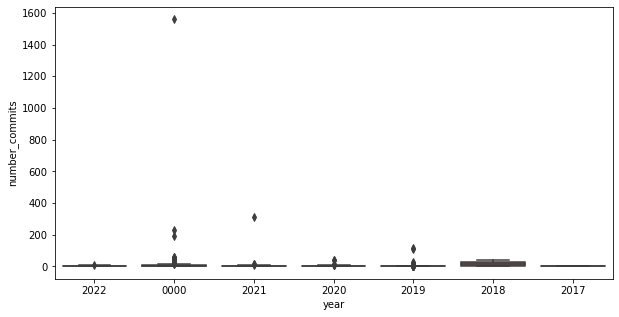

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="number_commits", data=request, ax=axes)
fig.savefig("figures/Git/year_vs_number_commits_unclean.jpg")

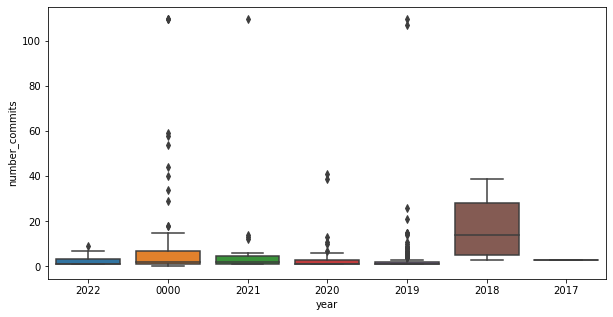

In [40]:
request["number_commits"].clip(upper=request["number_commits"].quantile(.99), inplace=True)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="number_commits", data=request, ax=axes)
fig.savefig("figures/Git/year_vs_number_commits_clean_99_percentile.jpg")

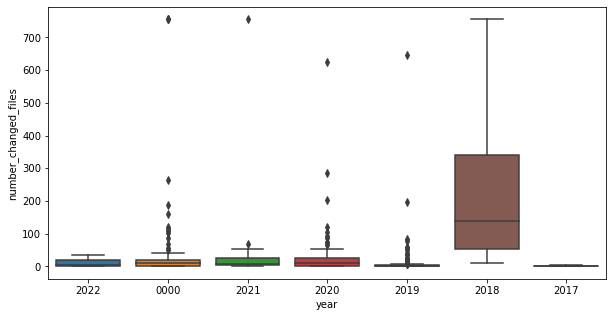

In [41]:
request["number_changed_files"].clip(upper=request["number_changed_files"].quantile(.99), inplace=True)

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="number_changed_files", data=request)
fig.savefig("figures/Git/year_vs_number_changed_files_clean_99_percentile.jpg")

In [42]:
#sb.pairplot(request)

from sklearn.decomposition import PCA

pca = PCA(n_components = len(request.columns))
pca.fit(request)
X_pca = pca.transform(request)
print("Original shape: %s" % str(request.shape))
print("Reduced shape: %s" % str(X_pca.shape))


print(request.columns)
print(pca.explained_variance_ratio_)

ValueError: could not convert string to float: '2022-05-18 20:57:35'